# Feature Engineering: Extraction and Selection in Bi-Dimensional data

## Overview

This document outlines an exploration into the phase of data preparation and feature engineering within the context of *predictive modeling*. The primary aim of this project is to showcase feature engineering techniques to enhance the performance of machine learning models. By extracting, transforming, and selecting features from raw data with high-dimentionality, we aim to uncover more meaningful patterns and insights that can significantly improve model accuracy and interpretability.

## Project Objectives

The note unfolds through several key stages:

1. **Data Reading and Preparation**: We begin by importing and consolidating our raw dataset from different sources, ensuring that our data is organized and accessible for analysis.

2. **Exploratory Data Analysis (EDA)**: Through descriptive statistics and visualizations, we gain a foundational understanding of the data's characteristics and distributions, setting the stage for more informed feature engineering decisions.

3. **Feature Extraction**: This stage involves the creation of new features from the existing data, utilizing domain knowledge and data analysis insights to craft variables that are potentially more predictive of the outcome.

4. **Feature Transformation and Selection**: We apply various techniques to modify and select the most relevant features, aiming to enhance model performance while reducing dimensionality and complexity.

5. **Modeling and Evaluation**: With our refined feature set, we train several machine learning models, including RandomForestRegressor, SVR, and Lasso, to predict outcomes with higher accuracy. This phase also involves rigorous error analysis to assess and improve model performance.

6. **Feature Importance and Optimization**: By analyzing feature importance and employing additional selection techniques like ReliefF, we further refine our feature set, focusing on variables that offer the most value to our predictive models.

7. **Conclusion and Future Work**: The project concludes with a synthesis of our findings, insights into the impact of feature engineering on model performance, and considerations for future explorations in this domain.

## Imports

In [3]:
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

## Reading the data

In [4]:
def read_and_combine(folder: str = "training"):
    """
    Reads and combines data from a specified folder into a pandas DataFrame.
    
    This function is designed to streamline the process of importing and consolidating
    datasets for analysis. It reads data files from the specified directory, 
    combines them into a single DataFrame, and returns the combined data for further processing.
    
    Parameters:
    - folder (str, optional): The name of the folder from which to read the data files. 
      This can be set to "training", "validation", or "test" to specify the dataset 
      to be read. The default value is "training".
    
    Returns:
    - pandas.DataFrame: A DataFrame containing the combined data from all files 
      within the specified folder.
    
    Example:
    >>> training_data = read_and_combine("training")
    >>> print(training_data.head())
    
    Note:
    - Ensure that the specified folder contains data files in a format that can be 
      read directly into a pandas DataFrame (e.g., CSV files).
    - The function assumes all files in the folder are relevant and should be combined.
    """
    # Path to the folder containing CSV files
    folder_path = "../data/" + folder
    # List to store DataFrames from each CSV file
    dataFrames = []
    # Loop through all files in the folder
    for filename in tqdm(os.listdir(folder_path)):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            # Read each CSV file into a DataFrame and append to the list
            dataframe = pd.read_csv(file_path)
            dataFrames.append(dataframe)
    # Combine all DataFrames into one
    combined_dataframe = pd.concat(dataFrames, ignore_index=True)
    # Save the combined DataFrame to a new CSV file
    combined_dataframe.to_csv('combined_output.csv', index=False)
    # Display the combined DataFrame
    return combined_dataframe

In [5]:
training_data = read_and_combine()
training_data.shape

100%|██████████| 185/185 [00:01<00:00, 92.66it/s] 
C:\Users\Oussama\AppData\Local\Temp\ipykernel_8572\3440815886.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(672744, 25)

In [6]:
validation_data = read_and_combine("validation")
validation_data.shape

100%|██████████| 185/185 [00:00<00:00, 236.33it/s]
C:\Users\Oussama\AppData\Local\Temp\ipykernel_8572\3440815886.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(144148, 25)

In [7]:
test_data = read_and_combine("test")
test_data.shape

100%|██████████| 185/185 [00:00<00:00, 238.48it/s]
C:\Users\Oussama\AppData\Local\Temp\ipykernel_8572\3440815886.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_dataframe = pd.concat(dataFrames, ignore_index=True)


(156262, 25)

## Let's the check the type of data we have

In [8]:
training_data.dtypes

MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


## Dataframe description

In [9]:
training_data.describe()

,TIMESTAMP,CHAMBER,USAGE_OF_BACKING_FILM,USAGE_OF_DRESSER,USAGE_OF_POLISHING_TABLE,USAGE_OF_DRESSER_TABLE,PRESSURIZED_CHAMBER_PRESSURE,MAIN_OUTER_AIR_BAG_PRESSURE,CENTER_AIR_BAG_PRESSURE,RETAINER_RING_PRESSURE,...,USAGE_OF_MEMBRANE,USAGE_OF_PRESSURIZED_SHEET,SLURRY_FLOW_LINE_A,SLURRY_FLOW_LINE_B,SLURRY_FLOW_LINE_C,WAFER_ROTATION,STAGE_ROTATION,HEAD_ROTATION,DRESSING_WATER_STATUS,EDGE_AIR_BAG_PRESSURE
count,6.727440e+05,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,...,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000,672744.000000
mean,4.844186e+08,4.223673,4968.532485,396.444964,171.983843,3496.348712,49.973427,155.327976,40.147023,1218.777316,...,58.915409,1490.559854,4.245952,0.725417,249.354458,12.802433,52.437560,159.792734,0.424763,28.531700
std,1.639134e+06,1.333534,2888.628864,219.524524,94.623563,479.742809,39.241073,133.191797,34.240954,1499.216737,...,34.252516,866.588654,6.683546,0.420575,214.034647,16.325427,91.878220,8.889108,0.494307,24.346485
min,4.816344e+08,1.000000,19.166667,5.185185,0.000000,2664.750000,0.000000,0.000000,0.000000,0.000000,...,0.227273,5.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.827736e+08,4.000000,2425.000000,205.185185,88.888889,3041.000000,0.000000,0.000000,0.000000,0.000000,...,28.754941,727.500000,2.222222,0.909091,0.000000,0.000000,0.000000,156.800000,0.000000,0.000000
50%,4.846534e+08,4.000000,5036.666667,395.925926,172.592593,3544.750000,72.857143,252.000000,61.250000,1446.900000,...,59.723320,1511.000000,2.222222,0.909091,411.600000,0.000000,0.000000,160.000000,0.000000,43.939394
75%,4.857991e+08,5.000000,7322.500000,590.370370,254.074074,3912.000000,77.142857,268.800000,66.250000,1454.700000,...,86.828063,2196.750000,2.222222,0.909091,439.600000,34.651163,65.526316,160.000000,1.000000,48.484848
max,4.872682e+08,6.000000,10532.500000,771.851852,357.037037,4305.500000,189.047619,499.200000,139.375000,10662.600000,...,124.891304,3159.750000,42.638889,12.500000,1083.600000,34.883721,263.552632,192.000000,1.000000,141.515152


## Draw all the timeseries

In [10]:
# import plotly.graph_objects as go
# import os
# from tqdm import tqdm

# # Specify the columns for which to draw time series
# metrics_of_interest = [
#     "USAGE_OF_BACKING_FILM",
#     "USAGE_OF_DRESSER",
#     "USAGE_OF_POLISHING_TABLE",
#     "USAGE_OF_DRESSER_TABLE",
#     "PRESSURIZED_CHAMBER_PRESSURE",
#     "MAIN_OUTER_AIR_BAG_PRESSURE",
#     "CENTER_AIR_BAG_PRESSURE",
#     "RETAINER_RING_PRESSURE",
#     "RIPPLE_AIR_BAG_PRESSURE",
#     "USAGE_OF_MEMBRANE",
#     "USAGE_OF_PRESSURIZED_SHEET",
#     "SLURRY_FLOW_LINE_A",
#     "SLURRY_FLOW_LINE_B",
#     "SLURRY_FLOW_LINE_C",
#     "WAFER_ROTATION",
#     "STAGE_ROTATION",
#     "HEAD_ROTATION",
#     "DRESSING_WATER_STATUS",
#     "EDGE_AIR_BAG_PRESSURE"
# ]

# # Directory for saving figures
# figures_dir = '../figures'
# os.makedirs(figures_dir, exist_ok=True)

# # Figure size parameters
# figure_width = 1600  # Width of the figure
# figure_height = 900  # Height of the figure

# # Iterate over each metric of interest
# for metric in tqdm(metrics_of_interest, desc="Metrics"):
#     # Create the figure
#     figure = go.Figure()
    
#     # Unique Wafer IDs
#     wafer_ids = training_data['WAFER_ID'].unique()
    
#     # Plot time series for each Wafer ID and each Stage
#     for wafer_id in wafer_ids:
#         # Unique stages for the current wafer_id
#         stages = training_data[training_data['WAFER_ID'] == wafer_id]['STAGE'].unique()
        
#         for stage in stages:
#             # Filter data for the current wafer_id and stage
#             wafer_stage_data = training_data[(training_data['WAFER_ID'] == wafer_id) & (training_data['STAGE'] == stage)].copy()
#             time = (wafer_stage_data['TIMESTAMP'].values - wafer_stage_data['TIMESTAMP'].values[0]) / 100
            
#             # Add the time series trace
#             figure.add_trace(go.Scatter(x=time, y=wafer_stage_data[metric],
#                                         mode='markers',
#                                         name=f'Wafer ID: {wafer_id}, Stage: {stage}'))
    
#     # Layout adjustments including figure size
#     figure.update_layout(
#         title=f'Time Series for Metric: {metric}',
#         xaxis_title='Time',
#         yaxis_title=metric,
#         showlegend=True,
#         width=figure_width,
#         height=figure_height
#     )
    
#     # Save the figure as an HTML file
#     figure_path = os.path.join(figures_dir, f'{metric}.html')
#     figure.write_html(figure_path)

#     # Show the last figure
#     if metric == metrics_of_interest[-1]:
#         figure.show()


## Feature Extraction
### Using a function
- Writing the function

In [11]:
import numpy as np
import pandas as pd
from tqdm import tqdm

def extract_features(data: pd.DataFrame,
                    id_column: str = "WAFER_ID",
                    non_extracted_columns: list = ["TIMESTAMP", "WAFER_ID", "CHAMBER"]):
    """
    Extract statistical features for each unique ID and Stage combination from the provided DataFrame.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data to process.
    - id_column (str): The name of the column in 'data' that contains the unique ID for each entity.
    - non_extracted_columns (list): A list of column names to exclude from feature extraction.
    
    Returns:
    - pd.DataFrame: A new DataFrame where each row contains the extracted features for each unique ID and Stage combination.
    """
    
    data_rows = []
    for (wafer, stage), group in tqdm(data.groupby([id_column, "STAGE"])):
        wafer_stage_data = group.copy()
        # Iterate through each numerical column and calculate the features using numpy
        features_np = {}
        for column in wafer_stage_data.select_dtypes(include='number').columns:
            if column in non_extracted_columns:
                continue
            col_data = wafer_stage_data[column].values  # Convert the column to a numpy array
            features_np.update({
                f'{column}_Mean': np.mean(col_data),
                f'{column}_Median': np.median(col_data),
                f'{column}_StdDev': np.std(col_data, ddof=1),
                f'{column}_Variance': np.var(col_data, ddof=1),
                f'{column}_Minimum': np.min(col_data),
                f'{column}_Maximum': np.max(col_data),
                f'{column}_Range': np.ptp(col_data),
                f'{column}_Skewness': pd.Series(col_data).skew(),
                f'{column}_Kurtosis': pd.Series(col_data).kurt(),
                f'{column}_25thPercentile': np.percentile(col_data, 25),
                f'{column}_50thPercentile': np.percentile(col_data, 50),
                f'{column}_75thPercentile': np.percentile(col_data, 75)
            })
        # Convert the features dictionary to a DataFrame
        feature_df = pd.DataFrame([features_np])
        feature_df.insert(0, id_column, wafer)
        feature_df.insert(1, "STAGE", stage)
        if "CHAMBER" in data.columns:
            feature_df.insert(2, "CHAMBER", np.unique(wafer_stage_data["CHAMBER"])[0])

        data_rows.append(feature_df)
    
    extracted_data = pd.concat(data_rows, ignore_index=True)
    return extracted_data


- Extracting the features

In [12]:
training_set = extract_features(training_data)
training_set.dtypes

100%|██████████| 1981/1981 [00:30<00:00, 64.80it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [13]:
validation_set = extract_features(validation_data)
validation_set.dtypes

100%|██████████| 424/424 [00:06<00:00, 62.61it/s]


WAFER_ID                                  int64
STAGE                                    object
CHAMBER                                 float64
USAGE_OF_BACKING_FILM_Mean              float64
USAGE_OF_BACKING_FILM_Median            float64
                                         ...   
EDGE_AIR_BAG_PRESSURE_Skewness          float64
EDGE_AIR_BAG_PRESSURE_Kurtosis          float64
EDGE_AIR_BAG_PRESSURE_25thPercentile    float64
EDGE_AIR_BAG_PRESSURE_50thPercentile    float64
EDGE_AIR_BAG_PRESSURE_75thPercentile    float64
Length: 231, dtype: object

In [14]:
test_set = extract_features(test_data)
test_data.dtypes

100%|██████████| 424/424 [00:06<00:00, 62.45it/s]


MACHINE_ID                       object
MACHINE_DATA                     object
TIMESTAMP                       float64
WAFER_ID                         object
STAGE                            object
CHAMBER                         float64
USAGE_OF_BACKING_FILM           float64
USAGE_OF_DRESSER                float64
USAGE_OF_POLISHING_TABLE        float64
USAGE_OF_DRESSER_TABLE          float64
PRESSURIZED_CHAMBER_PRESSURE    float64
MAIN_OUTER_AIR_BAG_PRESSURE     float64
CENTER_AIR_BAG_PRESSURE         float64
RETAINER_RING_PRESSURE          float64
RIPPLE_AIR_BAG_PRESSURE         float64
USAGE_OF_MEMBRANE               float64
USAGE_OF_PRESSURIZED_SHEET      float64
SLURRY_FLOW_LINE_A              float64
SLURRY_FLOW_LINE_B              float64
SLURRY_FLOW_LINE_C              float64
WAFER_ROTATION                  float64
STAGE_ROTATION                  float64
HEAD_ROTATION                   float64
DRESSING_WATER_STATUS           float64
EDGE_AIR_BAG_PRESSURE           float64


### Using tsfresh

In [15]:
from tsfresh.feature_extraction import extract_features
from tsfresh.utilities.distribution import MultiprocessingDistributor


import numpy as np
import pandas as pd
from tqdm import tqdm

def extract_features_tsfresh(data: pd.DataFrame,
                             id_column: str = "WAFER_ID",
                             non_extracted_columns: list = ["TIMESTAMP", "WAFER_ID", "CHAMBER"]):
    """
    Extract statistical features for each unique ID and Stage combination from the provided DataFrame.
    
    Parameters:
    - data (pd.DataFrame): The DataFrame containing the data to process.
    - id_column (str): The name of the column in 'data' that contains the unique ID for each entity.
    - non_extracted_columns (list): A list of column names to exclude from feature extraction.
    
    Returns:
    - pd.DataFrame: A new DataFrame where each row contains the extracted features for each unique ID and Stage combination.
    """
    
    data_rows = []
    for (wafer, stage), group in tqdm(data.groupby([id_column, "STAGE"])):
        wafer_stage_data = group.copy()
        wafer_stage_data = wafer_stage_data.drop(["MACHINE_ID", "MACHINE_DATA"], axis=1)
        # Iterate through each numerical column and calculate the features using numpy
        # Melt the DataFrame to have one sensor reading per row, keeping 'TIMESTAMP' as the time column
        long_format = wafer_stage_data.melt(id_vars=['WAFER_ID', 'STAGE', 'TIMESTAMP'], var_name='Sensor', value_name='Value')
        distributor = MultiprocessingDistributor(n_workers=4,
                                                 disable_progressbar=True)
        feature_df = extract_features(timeseries_container=long_format,
                                        column_id='WAFER_ID',
                                        column_sort='TIMESTAMP',
                                        column_kind='STAGE',
                                        column_value='Value',
                                        distributor=distributor)

        feature_df.insert(0, id_column, wafer)
        feature_df.insert(1, "STAGE", stage)
        if "CHAMBER" in data.columns:
            feature_df.insert(2, "CHAMBER", np.unique(wafer_stage_data["CHAMBER"])[0])

        data_rows.append(feature_df)
    
    extracted_data = pd.concat(data_rows, ignore_index=True)
    return extracted_data

In [16]:
training_set_tesfresh = extract_features_tsfresh(training_data)
training_set_tesfresh.dtypes

  0%|          | 8/1981 [03:54<16:57:38, 30.95s/it]

In [ ]:
test_set_tesfresh = extract_features_tsfresh(test_data)
test_set_tesfresh.dtypes

- Delete the raw data

In [21]:
del training_data, validation_data, test_data

- Add the output column to the sets

In [22]:
def add_output_column(data: pd.DataFrame(),
                      data_name: str = "training"):
    output_data = pd.read_csv("../data/CMP-" + data_name + "-removalrate.csv")
    data = pd.merge(data, output_data, on=['WAFER_ID', 'STAGE'])
    return data   

In [23]:
training_set = add_output_column(training_set)

In [24]:
training_set['STAGE'] = training_set['STAGE'].replace({'A': 0, 'B': 1})
training_set.head()

C:\Users\Oussama\AppData\Local\Temp\ipykernel_21740\1518546090.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,-4230160598,0,4.0,890.069846,890.833333,3.709068,13.757185,884.166667,896.666667,12.500000,...,422.571307,0.0,57.878788,57.878788,-1.254628,-0.261978,48.484848,48.484848,48.484848,68.88180
1,-4230160594,1,4.0,1291.998698,1293.333333,4.324576,18.701959,1285.833333,1298.333333,12.500000,...,834.453487,0.0,106.363636,106.363636,-0.446917,-0.612414,43.939394,44.242424,70.000000,70.05330
2,-4230160436,1,4.0,3272.829619,3273.333333,3.423431,11.719881,3266.666667,3277.500000,10.833333,...,1867.577448,0.0,141.515152,141.515152,1.238519,0.891666,0.000000,43.939394,44.242424,54.30720
3,-4230160428,0,4.0,5922.780214,5924.166667,2.480098,6.150885,5918.333333,5925.000000,6.666667,...,587.820962,0.0,57.878788,57.878788,0.395049,-1.796705,0.000000,0.000000,48.484848,75.34995
4,-4230160424,0,4.0,4868.350291,4870.000000,2.159261,4.662410,4864.166667,4870.000000,5.833333,...,598.141525,0.0,57.878788,57.878788,0.430882,-1.787898,0.000000,0.000000,48.787879,78.33015


In [25]:
training_set_tesfresh = add_output_column(training_set_tesfresh)
test_set_tesfresh = add_output_column(test_set_tesfresh,
                                      data_name="test")

In [26]:
test_set['STAGE'] = test_set['STAGE'].replace({'A': 0, 'B': 1})
test_set.head()

C:\Users\Oussama\AppData\Local\Temp\ipykernel_21740\4273652437.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,WAFER_ID,STAGE,CHAMBER,USAGE_OF_BACKING_FILM_Mean,USAGE_OF_BACKING_FILM_Median,USAGE_OF_BACKING_FILM_StdDev,USAGE_OF_BACKING_FILM_Variance,USAGE_OF_BACKING_FILM_Minimum,USAGE_OF_BACKING_FILM_Maximum,USAGE_OF_BACKING_FILM_Range,...,EDGE_AIR_BAG_PRESSURE_Variance,EDGE_AIR_BAG_PRESSURE_Minimum,EDGE_AIR_BAG_PRESSURE_Maximum,EDGE_AIR_BAG_PRESSURE_Range,EDGE_AIR_BAG_PRESSURE_Skewness,EDGE_AIR_BAG_PRESSURE_Kurtosis,EDGE_AIR_BAG_PRESSURE_25thPercentile,EDGE_AIR_BAG_PRESSURE_50thPercentile,EDGE_AIR_BAG_PRESSURE_75thPercentile,AVG_REMOVAL_RATE
0,-4226160404,0,4.0,10060.889356,10061.666667,3.866124,14.946915,10055.000000,10067.500000,12.500000,...,396.731174,0.0,57.575758,57.575758,-1.375061,0.079085,48.484848,48.484848,48.484848,60.44715
1,-4224160678,1,4.0,9526.132959,9526.666667,3.834909,14.706529,9520.000000,9533.333333,13.333333,...,337.359492,0.0,57.878788,57.878788,-1.507054,0.669936,43.939394,44.242424,48.787879,66.98130
2,-4224160592,0,4.0,9332.545761,9332.916667,3.690949,13.623101,9326.666667,9339.166667,12.500000,...,354.062453,0.0,57.878788,57.878788,-1.393967,0.326083,43.939394,44.242424,48.787879,56.17860
3,-4222160444,1,4.0,3375.676944,3375.833333,4.013973,16.111976,3369.166667,3382.500000,13.333333,...,269.665701,0.0,57.878788,57.878788,-1.745680,1.540839,43.939394,43.939394,43.939394,60.87570
4,-4222160424,1,4.0,3519.689266,3520.000000,3.829559,14.665525,3513.333333,3526.666667,13.333333,...,318.564737,0.0,57.878788,57.878788,-1.435073,0.565049,43.939394,43.939394,44.242424,78.17175


In [ ]:
test_set = add_output_column(test_set,
                             data_name="test")

In [27]:
training_set.to_csv('training_set.csv', index=False)
test_set.to_csv('test_set.csv', index=False)

# First modeling trials
- Establishing a baseline

In [28]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def train_evaluate_models(training_inputs,
                          training_outputs, 
                          test_inputs,
                          test_outputs,
                          outputs_scaler):
    """
    Train and evaluate RandomForestRegressor, SVR, and Lasso models.

    Parameters:
    - training_inputs (np.array): Scaled inputs for training the models.
    - training_outputs (np.array): Scaled outputs for training the models.
    - test_inputs (np.array): Scaled inputs for testing the models.
    - test_outputs (np.array): Scaled outputs for testing the models.
    - outputs_scaler (sklearn.preprocessing.StandardScaler): Scaler used to scale the outputs.

    Returns:
    - pd.DataFrame: A DataFrame containing evaluation metrics for each model.
    """
    
    # Initialize models
    model_rf = RandomForestRegressor()
    model_svr = SVR()
    model_lasso = Lasso()

    # Fit the models
    model_rf.fit(training_inputs, training_outputs)
    model_svr.fit(training_inputs, training_outputs)
    model_lasso.fit(training_inputs, training_outputs)

    # Predict on the test data
    predictions_rf = model_rf.predict(test_inputs)
    predictions_svr = model_svr.predict(test_inputs)
    predictions_lasso = model_lasso.predict(test_inputs)

    # Inverse transform the predictions and the actual values to get back to the original scale
    predictions_rf_inv = outputs_scaler.inverse_transform(predictions_rf.reshape(-1, 1)).flatten()
    predictions_svr_inv = outputs_scaler.inverse_transform(predictions_svr.reshape(-1, 1)).flatten()
    predictions_lasso_inv = outputs_scaler.inverse_transform(predictions_lasso.reshape(-1, 1)).flatten()
    test_outputs_inv = outputs_scaler.inverse_transform(test_outputs.reshape(-1, 1)).flatten()

    # Compile metrics for each model
    metrics = {}
    for name, predictions_inv in zip(['Random Forest', 'SVR', 'Lasso'], 
                                      [predictions_rf_inv, predictions_svr_inv, predictions_lasso_inv]):
        errors = predictions_inv - test_outputs_inv
        relative_errors = errors / np.maximum(np.abs(test_outputs_inv), 1e-8)
        
        metrics[name] = {
            'Mean of Error': np.mean(errors),
            'Std of Error': np.std(errors),
            'Max of Error': np.max(errors),
            'MAE': mean_absolute_error(test_outputs_inv, predictions_inv),
            'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_inv),
            'Max Absolute Percentage Error': np.max(np.abs(relative_errors)),
            'MSE': mean_squared_error(test_outputs_inv, predictions_inv),
            'SSE': np.sum(np.square(errors)),
            'R': np.corrcoef(test_outputs_inv, predictions_inv)[0, 1],
            'R2 Score': r2_score(test_outputs_inv, predictions_inv)
        }

    # Create a pandas DataFrame to display the results
    results_df = pd.DataFrame(metrics)
    
    return results_df.T, 

In [31]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ks_2samp, norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

def train_evaluate_models(training_inputs,
                          training_outputs, 
                          test_inputs,
                          test_outputs, 
                          outputs_scaler = None):
    """
    Train, evaluate, and perform error analysis on RandomForestRegressor, SVR, and Lasso models.

    Parameters:
    - scaled_training_inputs (np.array): Scaled inputs for training.
    - scaled_training_outputs (np.array): Scaled outputs for training.
    - scaled_test_inputs (np.array): Scaled inputs for testing.
    - scaled_test_outputs (np.array): Scaled outputs for testing.
    - outputs_scaler (object): Scaler used for the output variable.
    - test_set (pd.DataFrame): Test set DataFrame containing 'WAFER_ID' for plotting.

    Returns:
    - pd.DataFrame: Evaluation metrics for each model.
    - Displays plots of errors, relative percentage errors, and error distributions with normal distribution.
    - Returns results from KS-tests.
    """
    # Initialize and fit models
    models = {
        'Random Forest': RandomForestRegressor(),
        'SVR': SVR(),
        'Lasso': Lasso()
    }
    predictions = {}
    for name, model in models.items():
        model.fit(training_inputs, training_outputs.ravel())
        predictions[name] = model.predict(test_inputs)

    # Inverse transform predictions and calculate errors
    errors, relative_errors, metrics = {}, {}, {}
    if outputs_scaler is None:
        test_outputs_inv = test_outputs
    else:    
        test_outputs_inv = outputs_scaler.inverse_transform(test_outputs.reshape(-1, 1)).flatten()

    for name, predictions in predictions.items():
        if outputs_scaler is None:
            predictions_inv = predictions
        else:
            predictions_inv = outputs_scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
        errors[name] = predictions_inv - test_outputs_inv
        relative_errors[name] = errors[name] / np.maximum(np.abs(test_outputs_inv), 1e-8)
        metrics[name] = {
            'Mean of Error': np.mean(errors),
            'Std of Error': np.std(errors),
            'Max of Error': np.max(errors),
            'MAE': mean_absolute_error(test_outputs_inv, predictions_inv),
            'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_inv),
            'Max Absolute Percentage Error': np.max(np.abs(relative_errors)),
            'MSE': mean_squared_error(test_outputs_inv, predictions_inv),
            'SSE': np.sum(np.square(errors)),
            'R': np.corrcoef(test_outputs_inv, predictions_inv)[0, 1],
            'R2 Score': r2_score(test_outputs_inv, predictions_inv),
            'KS-test p-value': ks_2samp(errors[name], np.random.normal(np.mean(errors[name]), np.std(errors[name]), len(errors[name]))).pvalue
        }

    # Plotting errors and relative percentage errors using Plotly
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Errors for Each Model', 'Relative Percentage Errors for Each Model'))
    colors = {'Random Forest': 'blue', 'SVR': 'orange', 'Lasso': 'green'}
    for name, color in colors.items():
        fig.add_trace(go.Scatter(y=errors[name], mode='markers', name=f'{name} Errors', marker_color=color), row=1, col=1)
        fig.add_trace(go.Scatter(y=relative_errors[name] * 100, mode='markers', name=f'{name} Relative Errors', marker_color=color), row=1, col=2)
    fig.update_layout(height=600, width=1200, title_text="Error Analysis")
    fig.show()

    # Error Distribution Analysis
    fig = make_subplots(rows=3, cols=1, subplot_titles=[f'{name} Error Distribution' for name in models.keys()])
    for i, (name, color) in enumerate(colors.items(), start=1):
        x_values = np.linspace(min(errors[name]), max(errors[name]), 1000)
        normal_dist = norm.pdf(x_values, np.mean(errors[name]), np.std(errors[name]))
        # Histogram of errors
        fig.add_trace(go.Histogram(x=errors[name], nbinsx=30, name=f'{name} Errors', marker_color=color, opacity=0.7), row=i, col=1)
        # Normal distribution curve
        fig.add_trace(go.Scatter(x=x_values, y=normal_dist, mode='lines', name='Normal Distribution', line=dict(color='red')), row=i, col=1)
    fig.update_layout(height=900, width=600, title_text="Error Distribution Analysis")
    fig.show()

    # Return evaluation metrics DataFrame and KS-test results
    metrics_df = pd.DataFrame(metrics).T
    ks_test_results = {name: ks_2samp(errors[name], np.random.normal(np.mean(errors[name]), np.std(errors[name]), len(errors[name]))) for name in models.keys()}
    return metrics_df, ks_test_results


- Deleting Outliers

In [32]:
training_set.shape

(1981, 232)

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

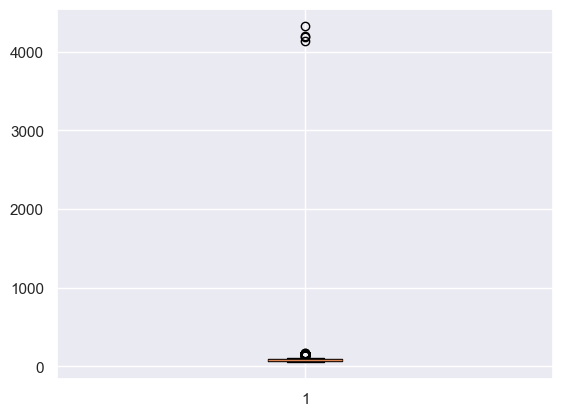

In [ ]:
plt.boxplot(training_set.AVG_REMOVAL_RATE)
# plt.ylim([0,200])
plt.show()

In [ ]:
q3 = training_set["AVG_REMOVAL_RATE"].quantile(0.75)
q1 = training_set["AVG_REMOVAL_RATE"].quantile(0.25)

iqr = q3 - q1

upper_limit = q3 + 2.5 * iqr
lower_limit = q1 - 2.5 * iqr

upper_limit, lower_limit


(135.75701250000003, 27.074362499999992)

In [ ]:
training_set[(training_set["AVG_REMOVAL_RATE"] <= upper_limit) 
             & (training_set["AVG_REMOVAL_RATE"] >= lower_limit)].shape[0] / training_set.shape[0]

0.7834020011771631

In [ ]:
from scipy import stats

training_set['z_score'] = stats.zscore(training_set["AVG_REMOVAL_RATE"])
training_set = training_set[training_set["z_score" ] < 3 ] 
training_set.shape

(1695, 233)

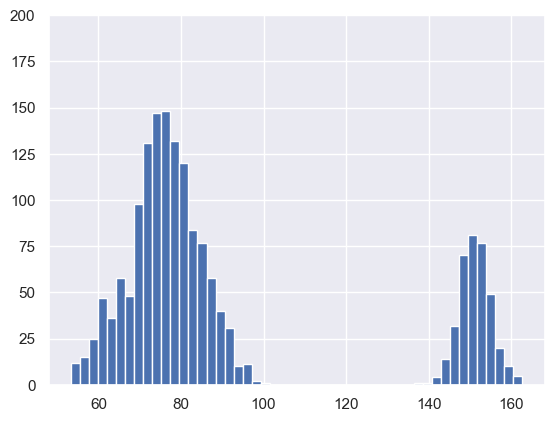

In [ ]:
plt.hist(training_set["AVG_REMOVAL_RATE"], bins=50)
plt.ylim(0,200)
plt.show()

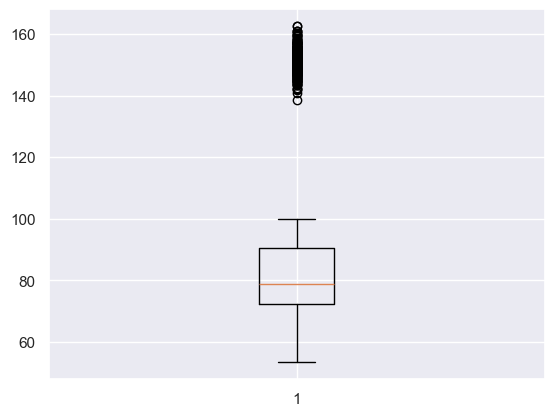

In [ ]:
plt.boxplot(training_set.AVG_REMOVAL_RATE)
# plt.ylim([0,200])
plt.show()

In [ ]:
test_set.shape

(414, 232)

In [ ]:
test_set['z_score'] = stats.zscore(test_set["AVG_REMOVAL_RATE"])
test_set = test_set[test_set["z_score" ] < 3 ] 
test_set.shape

(414, 233)

In [ ]:
# Create training inputs and outputs
training_inputs = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE', "z_score", 'CHAMBER']).values
training_outputs = training_set['AVG_REMOVAL_RATE'].values

# Create test inputs and outputs
test_inputs = test_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE', "z_score", 'CHAMBER']).values
test_outputs = test_set['AVG_REMOVAL_RATE'].values

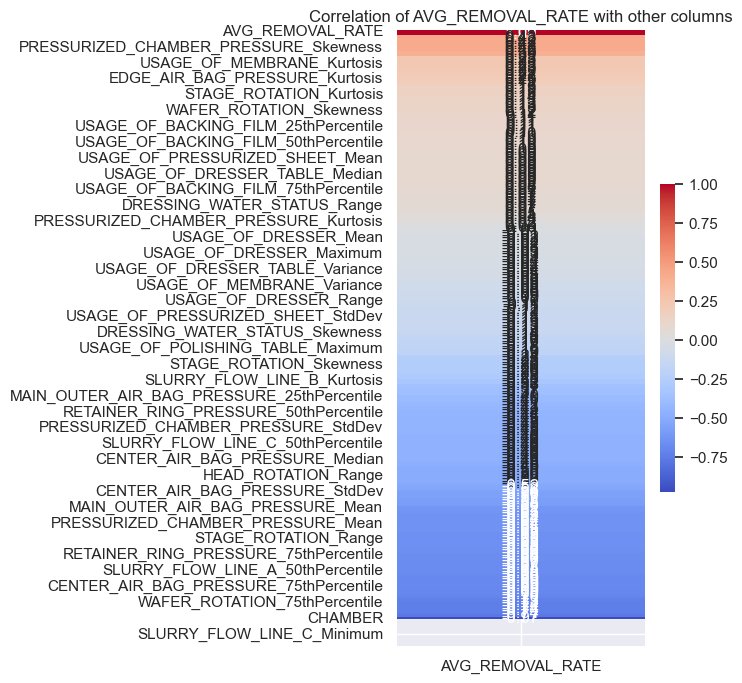

In [ ]:
def plot_correlation_heatmap(df, target_column):
    """
    Plot a heatmap of the correlation of one column with all others in the DataFrame.

    :param df: Pandas DataFrame containing the data
    :param target_column: The column name for which the correlation with all other columns is calculated
    """
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Isolate the correlations of the target_column with all other columns
    target_correlation = correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False)

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(4, 8))

    # Draw the heatmap
    sns.heatmap(target_correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5}, ax=ax)

    # Add title
    plt.title(f'Correlation of {target_column} with other columns')

    # Show the plot
    plt.show()
    return target_correlation


target_correlation = plot_correlation_heatmap(training_set, "AVG_REMOVAL_RATE")

In [ ]:
# Reset index without adding a new column
target_correlation = target_correlation.reset_index(drop=True)

print(target_correlation)


     AVG_REMOVAL_RATE
0            1.000000
1            1.000000
2            0.427487
3            0.421581
4            0.421287
..                ...
228               NaN
229               NaN
230               NaN
231               NaN
232               NaN

[233 rows x 1 columns]


In [ ]:
target_correlation = target_correlation.dropna()

target_correlation = target_correlation[(target_correlation >= 0.2) 
                                        & (target_correlation <= -0.2 )]
target_correlation

,AVG_REMOVAL_RATE
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
218,NaN
219,NaN
220,NaN
221,NaN


<Axes: >

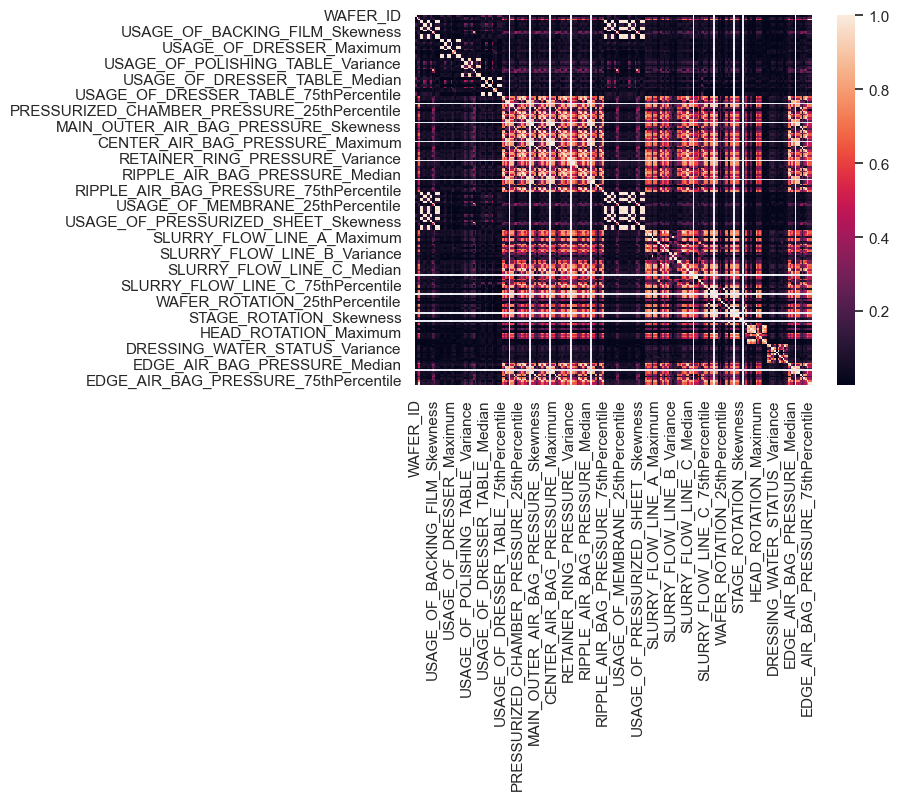

In [ ]:
sns.heatmap(np.abs(training_set.corr()))

- Scaling the data

In [ ]:
# Initialize two MinMaxScaler: one for inputs and one for outputs
inputs_scaler = MinMaxScaler()
outputs_scaler = MinMaxScaler()

# Fit the scalers to the training data and transform both training and test data
# Scaling inputs
scaled_training_inputs = inputs_scaler.fit_transform(training_inputs)
scaled_test_inputs = inputs_scaler.transform(test_inputs)

# Scaling outputs. Reshape is used because fit_transform expects 2D array
scaled_training_outputs = outputs_scaler.fit_transform(training_outputs.reshape(-1, 1)).flatten()
scaled_test_outputs = outputs_scaler.transform(test_outputs.reshape(-1, 1)).flatten()

- First models using RandomForests, SVR, and Lasso.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
# Initialize models
model_rf = RandomForestRegressor()
model_svr = SVR()
model_lasso = Lasso()

# Fit the models
model_rf.fit(scaled_training_inputs, scaled_training_outputs)
model_svr.fit(scaled_training_inputs, scaled_training_outputs)
model_lasso.fit(scaled_training_inputs, scaled_training_outputs)

# Predict on the test data
predictions_rf = model_rf.predict(scaled_test_inputs)
predictions_svr = model_svr.predict(scaled_test_inputs)
predictions_lasso = model_lasso.predict(scaled_test_inputs)

# Inverse transform the predictions and the actual values to get back to the original scale
predictions_rf_inv = outputs_scaler.inverse_transform(predictions_rf.reshape(-1, 1)).flatten()
predictions_svr_inv = outputs_scaler.inverse_transform(predictions_svr.reshape(-1, 1)).flatten()
predictions_lasso_inv = outputs_scaler.inverse_transform(predictions_lasso.reshape(-1, 1)).flatten()
test_outputs_inv = outputs_scaler.inverse_transform(scaled_test_outputs.reshape(-1, 1)).flatten()

# Calculate errors for each model
errors_rf = predictions_rf_inv - test_outputs_inv
errors_svr = predictions_svr_inv - test_outputs_inv
errors_lasso = predictions_lasso_inv - test_outputs_inv

relative_errors_rf = errors_rf / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_svr = errors_svr / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_lasso = errors_lasso / np.maximum(np.abs(test_outputs_inv), 1e-8)

# Calculate additional metrics
metrics_rf_updated = {
    'Mean of Error': np.mean(errors_rf),
    'Std of Error': np.std(errors_rf),
    'Max of Error': np.max(errors_rf),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_rf_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_rf_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_rf / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_rf_inv),
    'SSE': np.sum(np.square(errors_rf)),
    'R': np.corrcoef(test_outputs_inv, predictions_rf_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_rf_inv)
}

metrics_svr_updated = {
    'Mean of Error': np.mean(errors_svr),
    'Std of Error': np.std(errors_svr),
    'Max of Error': np.max(errors_svr),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_svr_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_svr_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_svr / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_svr_inv),
    'SSE': np.sum(np.square(errors_svr)),
    'R': np.corrcoef(test_outputs_inv, predictions_svr_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_svr_inv)
}

metrics_lasso_updated = {
    'Mean of Error': np.mean(errors_lasso),
    'Std of Error': np.std(errors_lasso),
    'Max of Error': np.max(errors_lasso),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_lasso_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_lasso_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_lasso / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_lasso_inv),
    'SSE': np.sum(np.square(errors_lasso)),
    'R': np.corrcoef(test_outputs_inv, predictions_lasso_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_lasso_inv)
}

# Create a pandas DataFrame to display the results
results_df = pd.DataFrame({'Random Forest': metrics_rf_updated,
                           'SVR': metrics_svr_updated,
                           'Lasso': metrics_lasso_updated})

results_df.T

c:\Users\Oussama\.conda\envs\featureengineering\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Oussama\.conda\envs\featureengineering\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest,0.363235,8.080877,73.587605,3.988586,0.046473,1.012768,65.432512,27089.059960,0.962668,0.926448
SVR,-0.074881,14.649173,80.346026,9.217634,0.105028,1.105783,214.603889,88846.009901,0.871546,0.758766
Lasso,1.884199,29.826327,37.562547,23.269761,0.247123,0.689189,893.159979,369768.231314,NaN,-0.003991


- Error Analysis

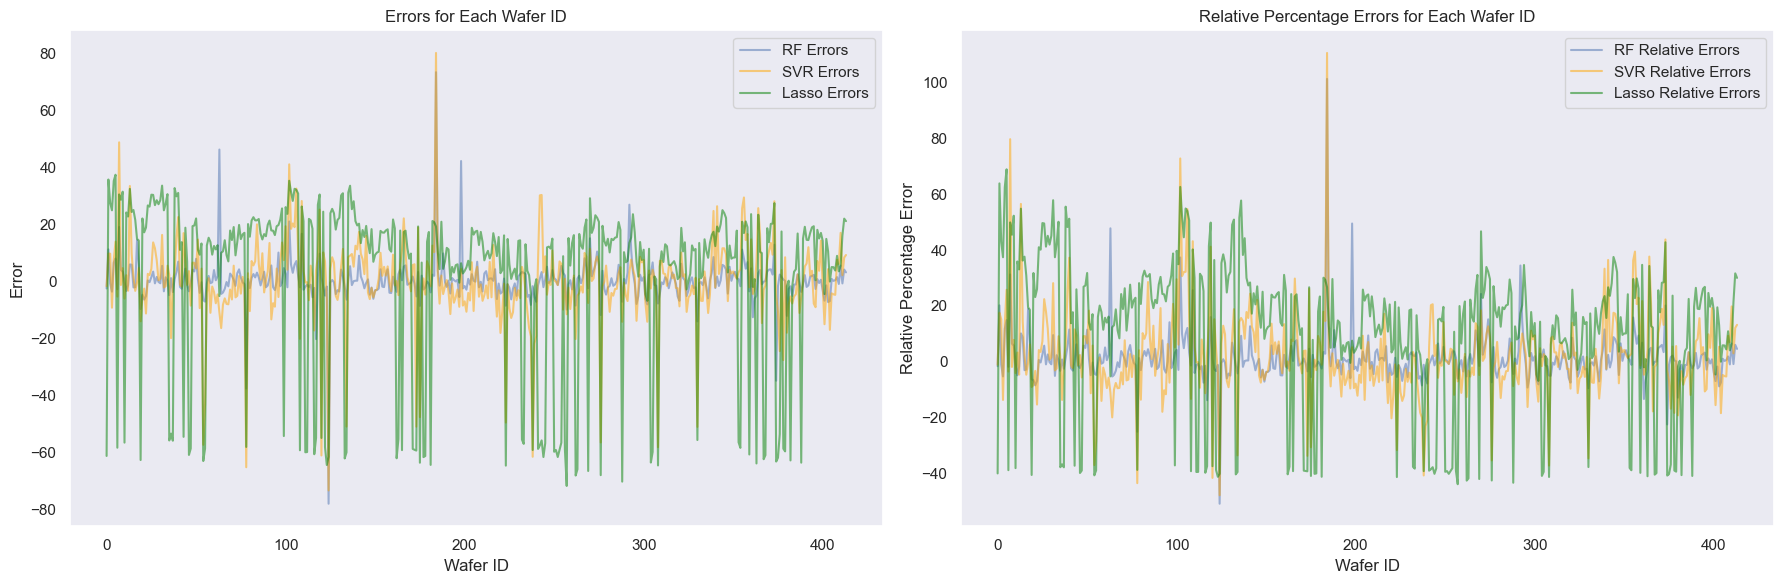

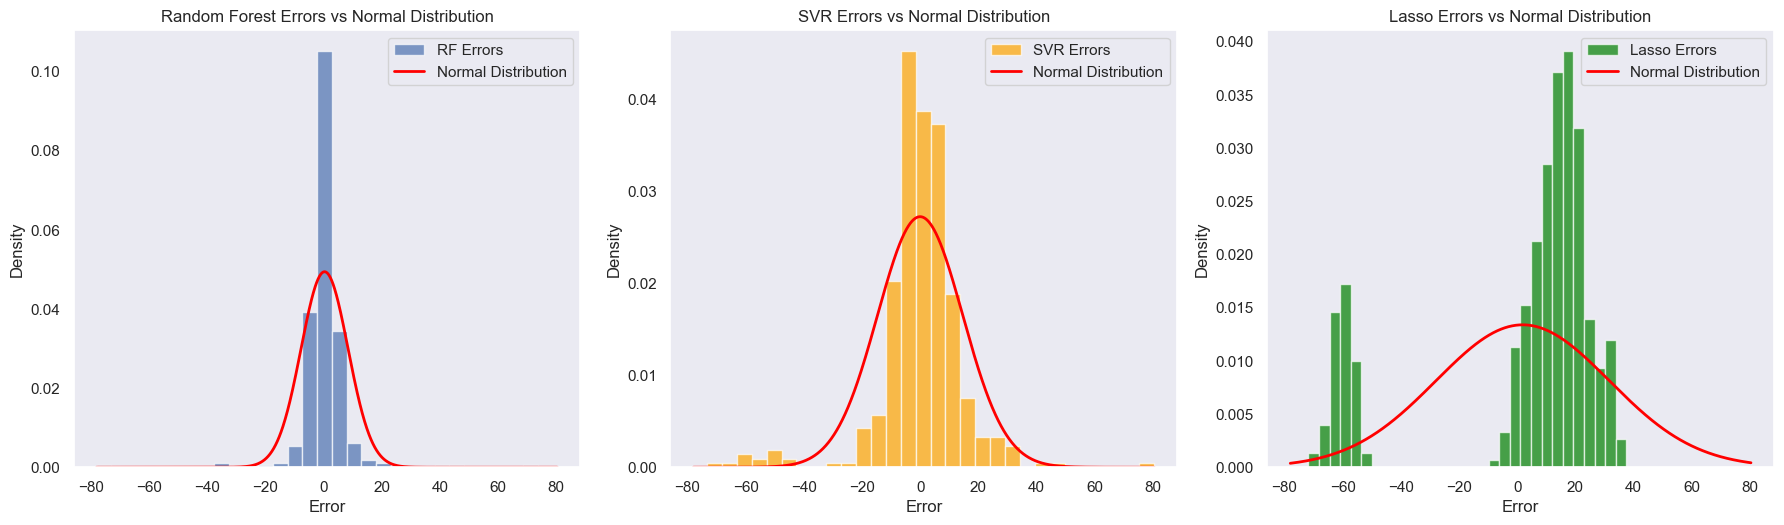

(KstestResult(statistic=0.21014492753623187, pvalue=2.0478407867363505e-08, statistic_location=-3.6793711511811074, statistic_sign=-1),
 KstestResult(statistic=0.17632850241545894, pvalue=4.878857756522268e-06, statistic_location=-7.817023690020374, statistic_sign=-1),
 KstestResult(statistic=0.24396135265700483, pvalue=3.195400722536174e-11, statistic_location=2.7035076358978087, statistic_sign=-1))

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import norm
# Get Wafer IDs from the test set for plotting
wafer_ids = test_set['WAFER_ID'].values

# Plot the errors of each model for each Wafer ID
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_rf, alpha=0.5, label='RF Errors')
plt.plot(errors_svr, alpha=0.5, label='SVR Errors', color='orange')
plt.plot(errors_lasso, alpha=0.5, label='Lasso Errors', color='green')
plt.title('Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()
plt.grid()

# Plot the relative percentage errors for each model for each Wafer ID
plt.subplot(1, 2, 2)
plt.plot(relative_errors_rf * 100, alpha=0.5, label='RF Relative Errors')
plt.plot(relative_errors_svr * 100, alpha=0.5, label='SVR Relative Errors', color='orange')
plt.plot(relative_errors_lasso * 100, alpha=0.5, label='Lasso Relative Errors', color='green')
plt.title('Relative Percentage Errors for Each Wafer ID')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

from scipy.stats import norm

# Calculate the mean and std of errors for each model
mean_error_rf, std_error_rf = np.mean(errors_rf), np.std(errors_rf)
mean_error_svr, std_error_svr = np.mean(errors_svr), np.std(errors_svr)
mean_error_lasso, std_error_lasso = np.mean(errors_lasso), np.std(errors_lasso)

# Generate a range of values for the normal distribution
x_values = np.linspace(min(np.min(errors_rf), np.min(errors_svr), np.min(errors_lasso)),
                       max(np.max(errors_rf), np.max(errors_svr), np.max(errors_lasso)), 1000)
# Normal distribution for each model
normal_distribution_rf = norm.pdf(x_values, mean_error_rf, std_error_rf)
normal_distribution_svr = norm.pdf(x_values, mean_error_svr, std_error_svr)
normal_distribution_lasso = norm.pdf(x_values, mean_error_lasso, std_error_lasso)

# Plot histograms of relative errors with normal distribution curve
plt.figure(figsize=(18, 15))

# Random Forest
plt.subplot(3, 3, 1)
plt.hist(errors_rf, bins=30, alpha=0.7, density=True, label='RF Errors')
plt.plot(x_values, normal_distribution_rf, label='Normal Distribution', linewidth=2, color='red')
plt.title('Random Forest Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

# SVR
plt.subplot(3, 3, 2)
plt.hist(errors_svr, bins=30, alpha=0.7, density=True, label='SVR Errors', color='orange')
plt.plot(x_values, normal_distribution_svr, label='Normal Distribution', linewidth=2, color='red')
plt.title('SVR Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

# Lasso
plt.subplot(3, 3, 3)
plt.hist(errors_lasso, bins=30, alpha=0.7, density=True, label='Lasso Errors', color='green')
plt.plot(x_values, normal_distribution_lasso, label='Normal Distribution', linewidth=2, color='red')
plt.title('Lasso Errors vs Normal Distribution')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Perform KS-test between the error distributions and a normal distribution
ks_test_rf_vs_normal = ks_2samp(errors_rf, np.random.normal(mean_error_rf, std_error_rf, size=len(errors_rf)))
ks_test_svr_vs_normal = ks_2samp(errors_svr, np.random.normal(mean_error_svr, std_error_svr, size=len(errors_svr)))
ks_test_lasso_vs_normal = ks_2samp(errors_lasso, np.random.normal(mean_error_lasso, std_error_lasso, size=len(errors_lasso)))

ks_test_rf_vs_normal, ks_test_svr_vs_normal, ks_test_lasso_vs_normal

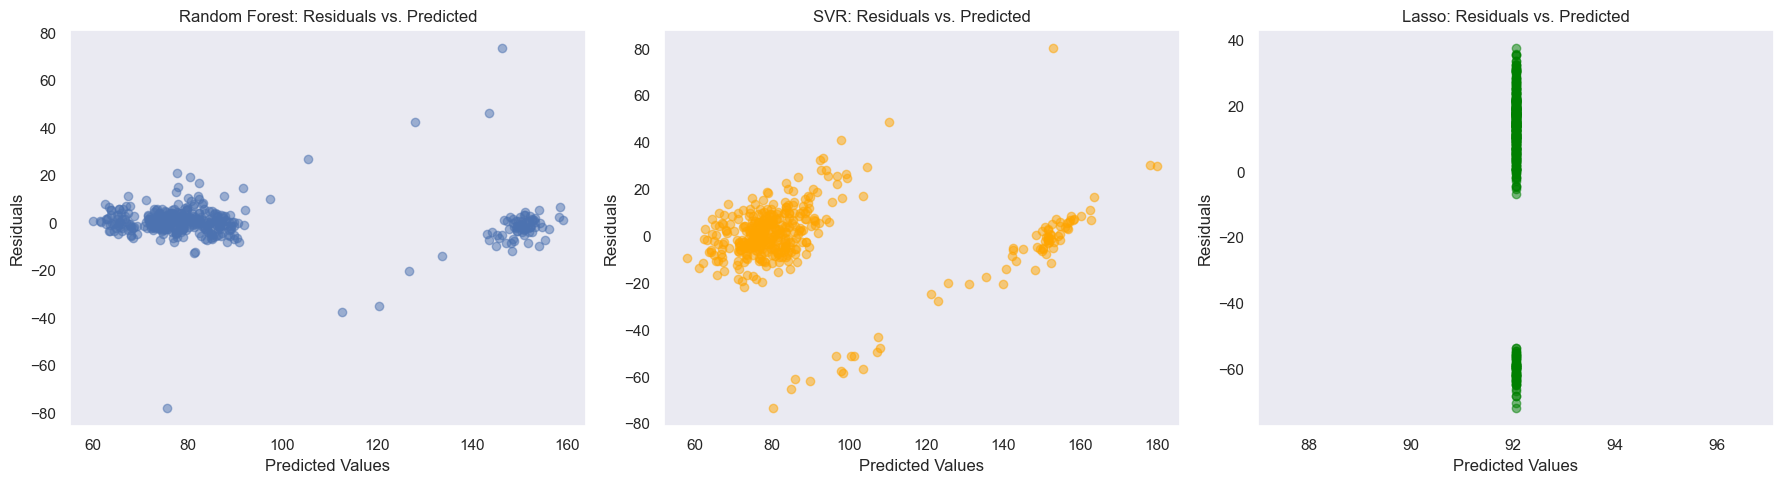

((414.0, 0.4768899541767327, nan, nan),
 (414.0, 0.4768899541767327, nan, nan),
 (414.0, 0.4768899541767327, nan, nan))

In [ ]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# Visual Inspection: Plotting residuals vs. predicted values
plt.figure(figsize=(18, 5))

# Random Forest
plt.subplot(1, 3, 1)
plt.scatter(predictions_rf_inv, errors_rf, alpha=0.5)
plt.title('Random Forest: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
# SVR
plt.subplot(1, 3, 2)
plt.scatter(predictions_svr_inv, errors_svr, alpha=0.5, color='orange')
plt.title('SVR: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
# Lasso
plt.subplot(1, 3, 3)
plt.scatter(predictions_lasso_inv, errors_lasso, alpha=0.5, color='green')
plt.title('Lasso: Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.tight_layout()
plt.show()

# White Test for Heteroscedasticity
# For demonstration, we'll conduct the White test on Random Forest residuals
# Note: White test requires the model's predictor variables (X) and the residuals (errors)
X = sm.add_constant(scaled_test_inputs)  # adding a constant for the intercept
white_test_results_rf = het_white(errors_rf, X)
white_test_results_svr = het_white(errors_svr, X)
white_test_results_lasso = het_white(errors_lasso, X)

white_test_results_rf, white_test_results_svr, white_test_results_lasso

- Rank the features

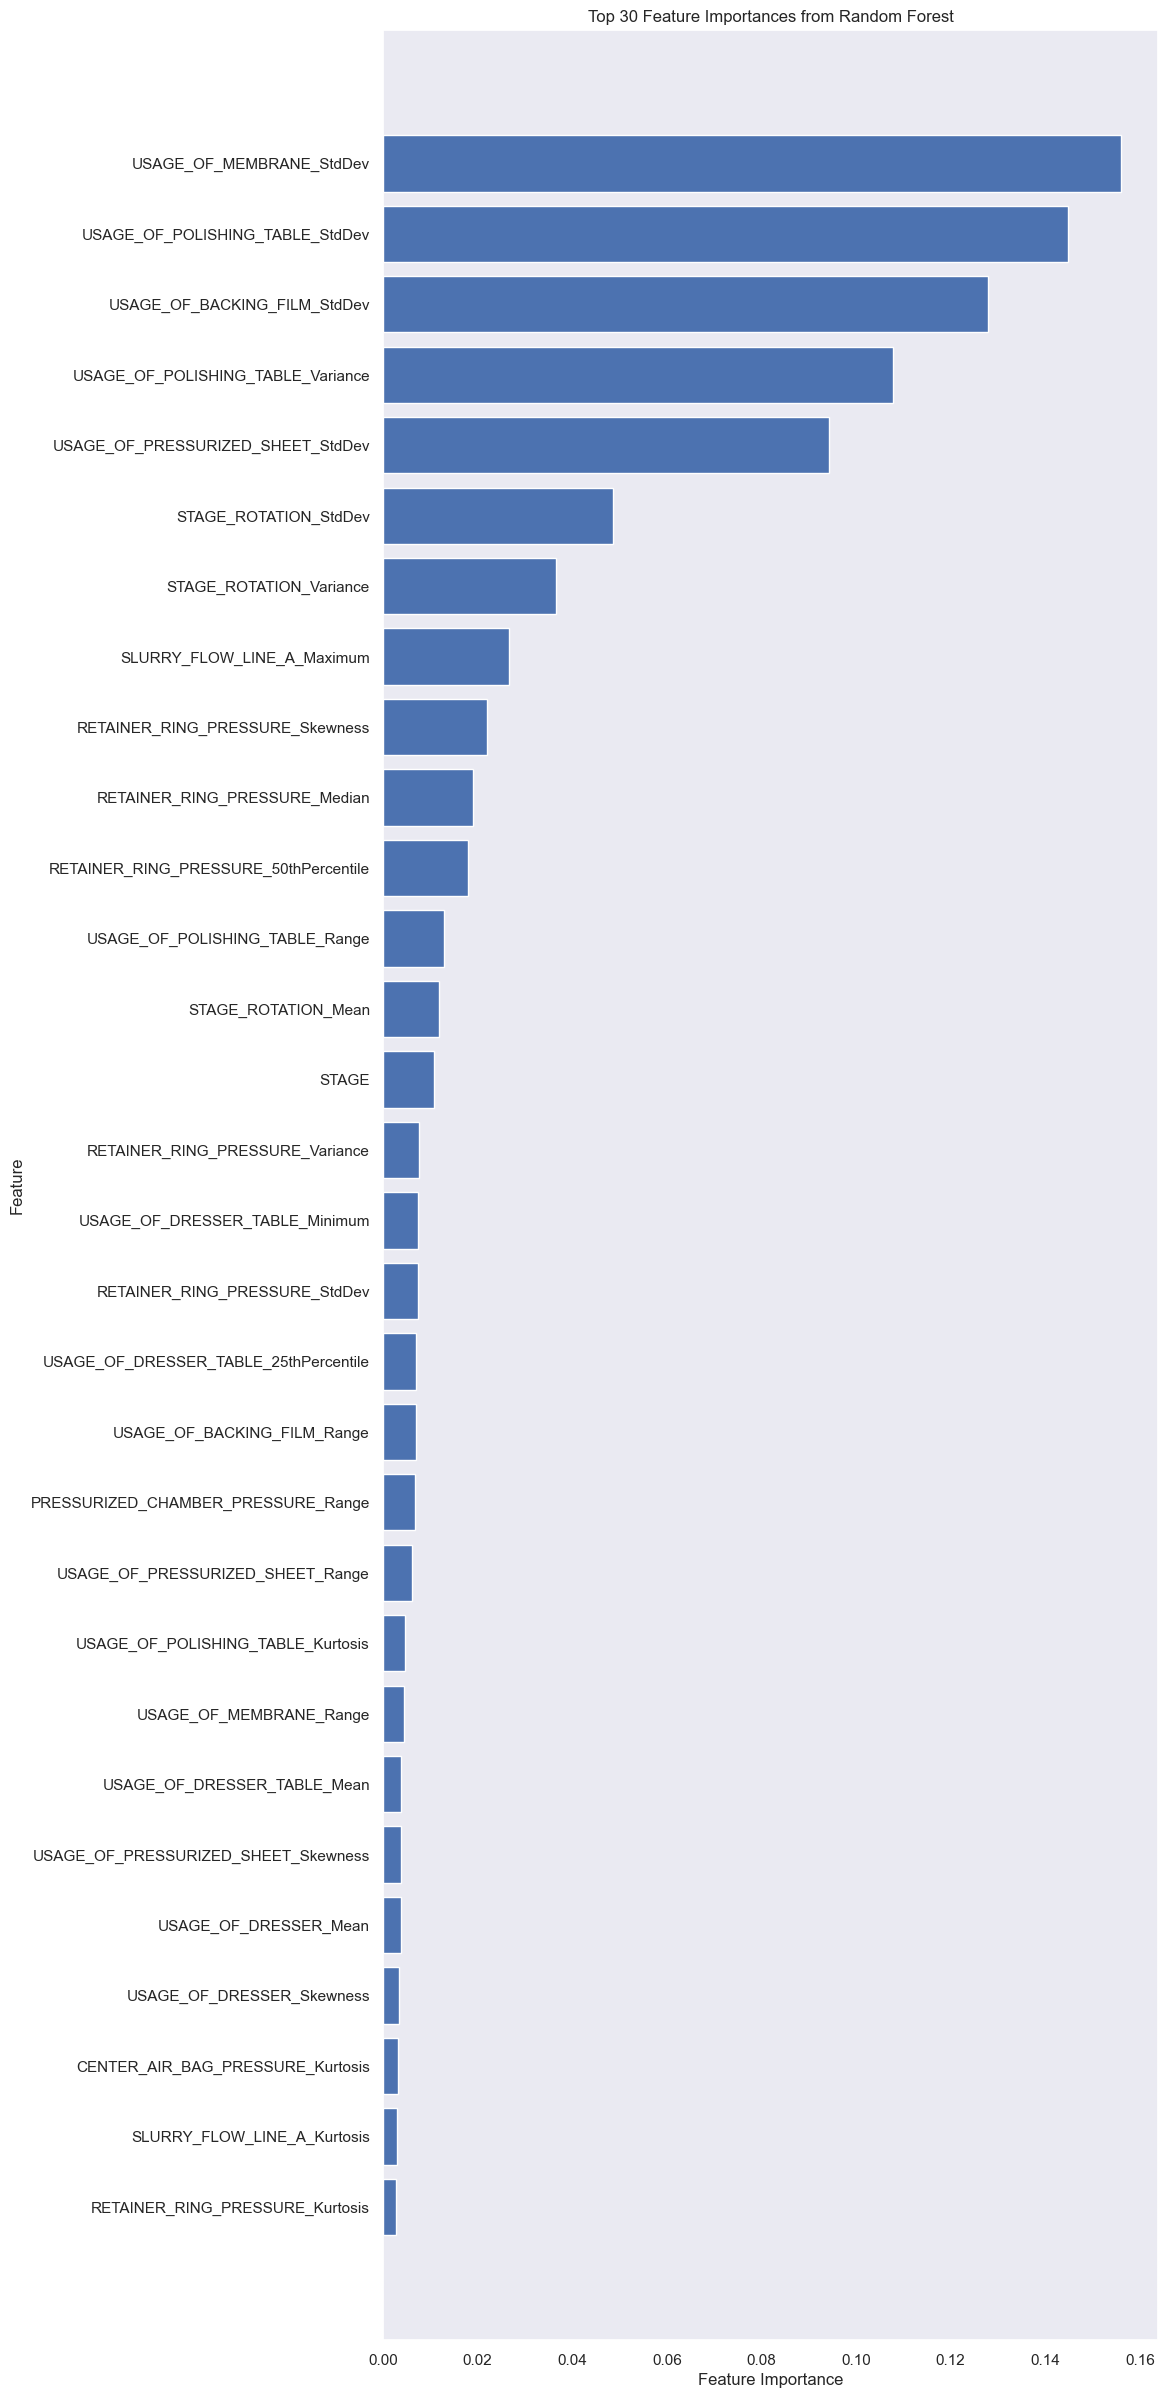

In [ ]:
# Extract feature importances from the Random Forest model and pair them with column names
feature_importances_rf = model_rf.feature_importances_
feature_names = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE', 'z_score', 'CHAMBER']).columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

# Sort the DataFrame based on feature importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.figure(figsize=(10, 30))
plt.barh(feature_importances_df['Feature'][:30], feature_importances_df['Importance'][:30])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.grid()
plt.show()

- The new models

In [ ]:
# Select the top 20 features
top_20_features = feature_importances_df['Feature'][:20].values

# Initialize two MinMaxScaler: one for inputs and one for outputs
inputs_scaler = MinMaxScaler()

# Create new training and test sets with only the top 20 features
scaled_training_inputs_top20 = inputs_scaler.fit_transform(training_set[top_20_features])
scaled_test_inputs_top20 = inputs_scaler.transform(test_set[top_20_features])

# Initialize models with the same configurations
model_rf_top20 = RandomForestRegressor()
model_svr_top20 = SVR()
model_lasso_top20 = Lasso()

# Fit the models on the training data with only top 20 features
model_rf_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)
model_svr_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)
model_lasso_top20.fit(scaled_training_inputs_top20, scaled_training_outputs)

# Predict on the test data with only top 20 features
predictions_rf_top20 = model_rf_top20.predict(scaled_test_inputs_top20)
predictions_svr_top20 = model_svr_top20.predict(scaled_test_inputs_top20)
predictions_lasso_top20 = model_lasso_top20.predict(scaled_test_inputs_top20)

# Inverse transform the predictions and the actual values to get back to the original scale
predictions_rf_top20_inv = outputs_scaler.inverse_transform(predictions_rf_top20.reshape(-1, 1)).flatten()
predictions_svr_top20_inv = outputs_scaler.inverse_transform(predictions_svr_top20.reshape(-1, 1)).flatten()
predictions_lasso_top20_inv = outputs_scaler.inverse_transform(predictions_lasso_top20.reshape(-1, 1)).flatten()

# Calculate errors for each model (top 20 features)
errors_rf_top20 = predictions_rf_top20_inv - test_outputs_inv
errors_svr_top20 = predictions_svr_top20_inv - test_outputs_inv
errors_lasso_top20 = predictions_lasso_top20_inv - test_outputs_inv

# Calculate additional metrics for each model (top 20 features)
metrics_rf_top20_updated = {
    'Mean of Error': np.mean(errors_rf_top20),
    'Std of Error': np.std(errors_rf_top20),
    'Max of Error': np.max(errors_rf_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_rf_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_rf_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_rf_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_rf_top20_inv),
    'SSE': np.sum(np.square(errors_rf_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_rf_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_rf_top20_inv)
}

metrics_svr_top20_updated = {
    'Mean of Error': np.mean(errors_svr_top20),
    'Std of Error': np.std(errors_svr_top20),
    'Max of Error': np.max(errors_svr_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_svr_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_svr_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_svr_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_svr_top20_inv),
    'SSE': np.sum(np.square(errors_svr_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_svr_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_svr_top20_inv)
}

metrics_lasso_top20_updated = {
    'Mean of Error': np.mean(errors_lasso_top20),
    'Std of Error': np.std(errors_lasso_top20),
    'Max of Error': np.max(errors_lasso_top20),
    'MAE': mean_absolute_error(test_outputs_inv, predictions_lasso_top20_inv),
    'Mean Absolute Percentage Error': mean_absolute_percentage_error(test_outputs_inv, predictions_lasso_top20_inv),
    'Max Absolute Percentage Error': np.max(np.abs(errors_lasso_top20 / test_outputs_inv)),
    'MSE': mean_squared_error(test_outputs_inv, predictions_lasso_top20_inv),
    'SSE': np.sum(np.square(errors_lasso_top20)),
    'R': np.corrcoef(test_outputs_inv, predictions_lasso_top20_inv)[0, 1],
    'R2 Score': r2_score(test_outputs_inv, predictions_lasso_top20_inv)
}

# Create a pandas DataFrame to display the results
results_top20_df = pd.DataFrame({'Random Forest (Top 20)': metrics_rf_top20_updated,
                                 'SVR (Top 20)': metrics_svr_top20_updated,
                                 'Lasso (Top 20)': metrics_lasso_top20_updated})

results_top20_df.T

c:\Users\Oussama\.conda\envs\featureengineering\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\Oussama\.conda\envs\featureengineering\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Mean of Error,Std of Error,Max of Error,MAE,Mean Absolute Percentage Error,Max Absolute Percentage Error,MSE,SSE,R,R2 Score
Random Forest (Top 20),-0.146468,3.343134,11.859620,2.488892,0.029756,0.188997,11.197996,4635.970147,0.993740,0.987412
SVR (Top 20),-0.062575,5.527931,13.222322,4.406775,0.052034,0.206634,30.561938,12652.642186,0.983444,0.965646
Lasso (Top 20),1.884199,29.826327,37.562547,23.269761,0.247123,0.689189,893.159979,369768.231314,NaN,-0.003991


- Error Analysis

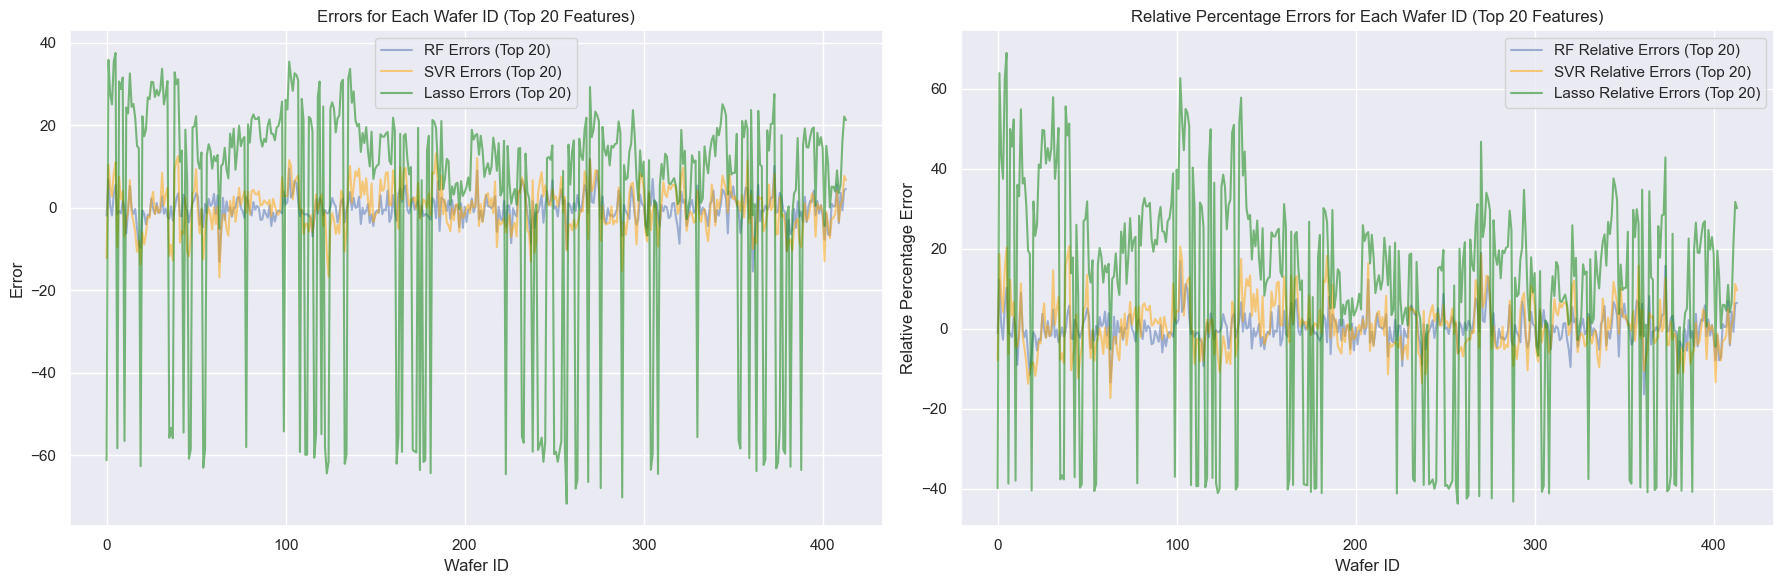

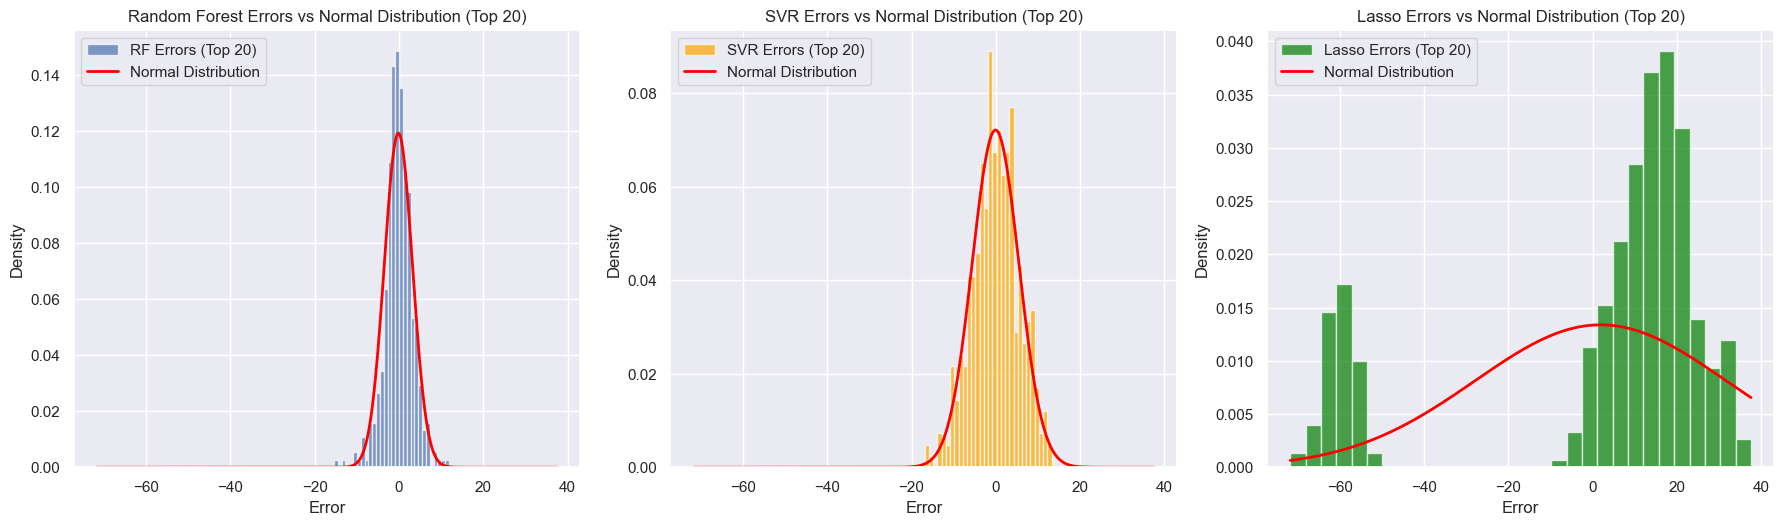

(KstestResult(statistic=0.05555555555555555, pvalue=0.5458190322700629, statistic_location=-1.691061731891745, statistic_sign=-1),
 KstestResult(statistic=0.04106280193236715, pvalue=0.8768218361397793, statistic_location=4.093510008207431, statistic_sign=1),
 KstestResult(statistic=0.2584541062801932, pvalue=1.4735915081675505e-12, statistic_location=-0.09079269453280348, statistic_sign=-1))

In [ ]:
# Calculate relative errors for each model (top 20 features)
relative_errors_rf_top20 = errors_rf_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_svr_top20 = errors_svr_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)
relative_errors_lasso_top20 = errors_lasso_top20 / np.maximum(np.abs(test_outputs_inv), 1e-8)

# Plot the errors of each model for each Wafer ID
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_rf_top20, alpha=0.5, label='RF Errors (Top 20)')
plt.plot(errors_svr_top20, alpha=0.5, label='SVR Errors (Top 20)', color='orange')
plt.plot(errors_lasso_top20, alpha=0.5, label='Lasso Errors (Top 20)', color='green')
plt.title('Errors for Each Wafer ID (Top 20 Features)')
plt.xlabel('Wafer ID')
plt.ylabel('Error')
plt.legend()

# Plot the relative percentage errors for each model for each Wafer ID
plt.subplot(1, 2, 2)
plt.plot(relative_errors_rf_top20 * 100, alpha=0.5, label='RF Relative Errors (Top 20)')
plt.plot(relative_errors_svr_top20 * 100, alpha=0.5, label='SVR Relative Errors (Top 20)', color='orange')
plt.plot(relative_errors_lasso_top20 * 100, alpha=0.5, label='Lasso Relative Errors (Top 20)', color='green')
plt.title('Relative Percentage Errors for Each Wafer ID (Top 20 Features)')
plt.xlabel('Wafer ID')
plt.ylabel('Relative Percentage Error')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate the mean and std of errors for each model (top 20 features)
mean_error_rf_top20, std_error_rf_top20 = np.mean(errors_rf_top20), np.std(errors_rf_top20)
mean_error_svr_top20, std_error_svr_top20 = np.mean(errors_svr_top20), np.std(errors_svr_top20)
mean_error_lasso_top20, std_error_lasso_top20 = np.mean(errors_lasso_top20), np.std(errors_lasso_top20)

# Generate a range of values for the normal distribution
x_values = np.linspace(min(np.min(errors_rf_top20), np.min(errors_svr_top20), np.min(errors_lasso_top20)),
                       max(np.max(errors_rf_top20), np.max(errors_svr_top20), np.max(errors_lasso_top20)), 1000)
# Normal distribution for each model
normal_distribution_rf_top20 = norm.pdf(x_values, mean_error_rf_top20, std_error_rf_top20)
normal_distribution_svr_top20 = norm.pdf(x_values, mean_error_svr_top20, std_error_svr_top20)
normal_distribution_lasso_top20 = norm.pdf(x_values, mean_error_lasso_top20, std_error_lasso_top20)

# Plot histograms of relative errors with normal distribution curve
plt.figure(figsize=(18, 15))

# Random Forest (Top 20)
plt.subplot(3, 3, 1)
plt.hist(errors_rf_top20, bins=30, alpha=0.7, density=True, label='RF Errors (Top 20)')
plt.plot(x_values, normal_distribution_rf_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('Random Forest Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

# SVR (Top 20)
plt.subplot(3, 3, 2)
plt.hist(errors_svr_top20, bins=30, alpha=0.7, density=True, label='SVR Errors (Top 20)', color='orange')
plt.plot(x_values, normal_distribution_svr_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('SVR Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

# Lasso (Top 20)
plt.subplot(3, 3, 3)
plt.hist(errors_lasso_top20, bins=30, alpha=0.7, density=True, label='Lasso Errors (Top 20)', color='green')
plt.plot(x_values, normal_distribution_lasso_top20, label='Normal Distribution', linewidth=2, color='red')
plt.title('Lasso Errors vs Normal Distribution (Top 20)')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Generate normal distributions based on the mean and std of errors for each model (top 20 features)
normal_errors_rf_top20 = np.random.normal(mean_error_rf_top20, std_error_rf_top20, size=len(errors_rf_top20))
normal_errors_svr_top20 = np.random.normal(mean_error_svr_top20, std_error_svr_top20, size=len(errors_svr_top20))
normal_errors_lasso_top20 = np.random.normal(mean_error_lasso_top20, std_error_lasso_top20, size=len(errors_lasso_top20))

# Perform KS-test between the error distributions and a normal distribution
ks_test_rf_top20_vs_normal = ks_2samp(errors_rf_top20, normal_errors_rf_top20)
ks_test_svr_top20_vs_normal = ks_2samp(errors_svr_top20, normal_errors_svr_top20)
ks_test_lasso_top20_vs_normal = ks_2samp(errors_lasso_top20, normal_errors_lasso_top20)

ks_test_rf_top20_vs_normal, ks_test_svr_top20_vs_normal, ks_test_lasso_top20_vs_normal


ReliefF

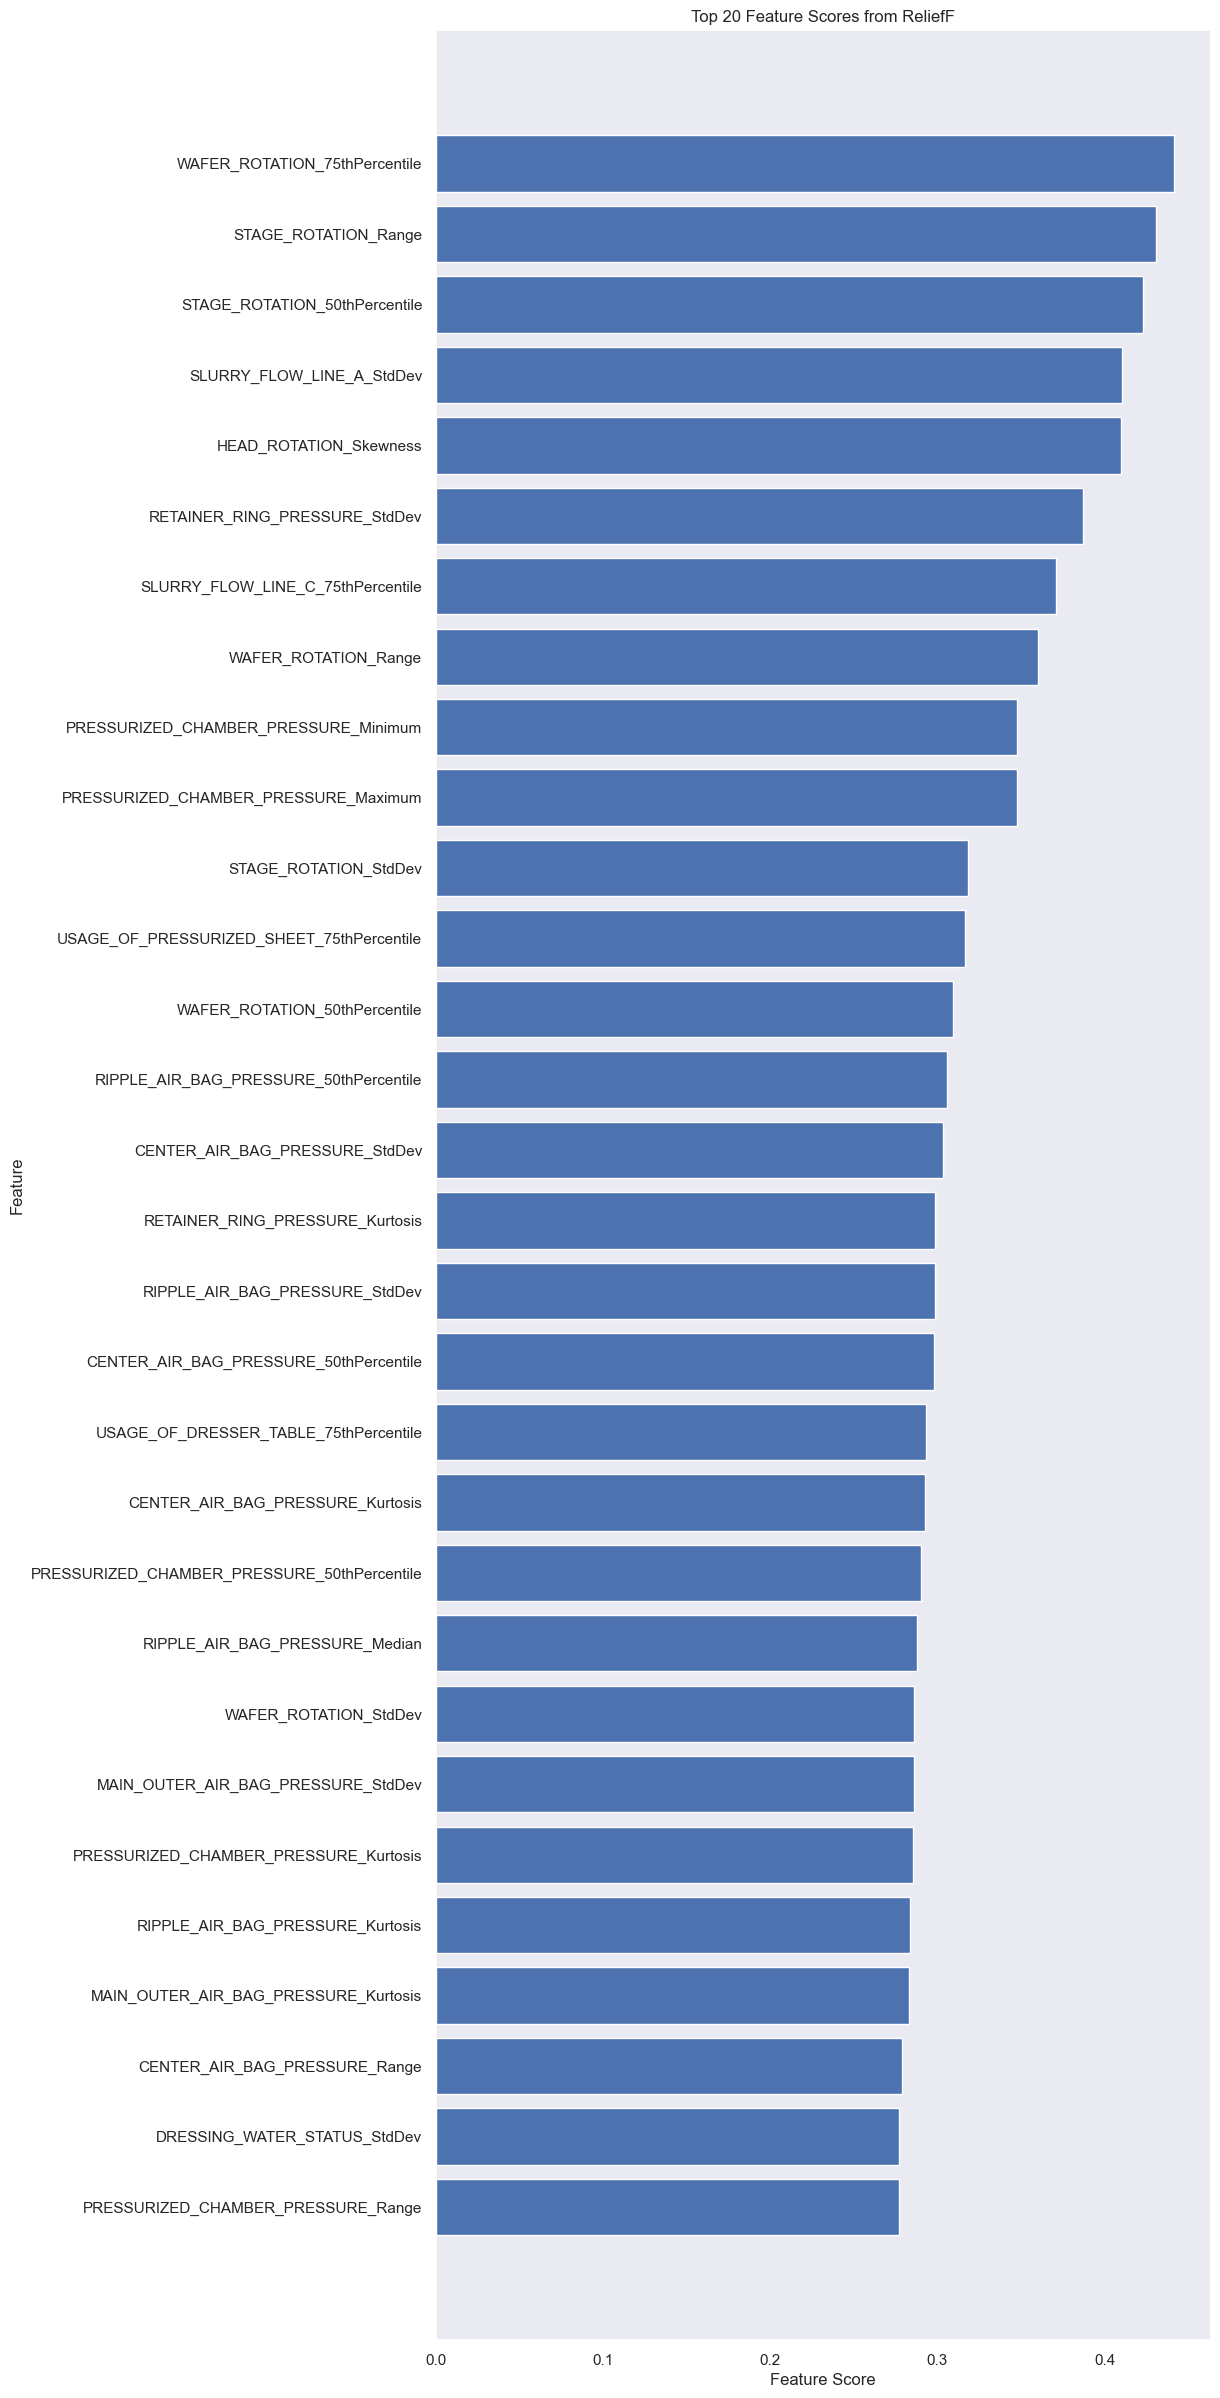

In [ ]:
from skrebate import ReliefF
from sklearn.model_selection import train_test_split

X = training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE', 'z_score', 'CHAMBER']).values
y = training_set['AVG_REMOVAL_RATE'].values

# It's a good practice to use a train/test split to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y)

fs = ReliefF(n_neighbors=30)
fs.fit(X_train, y_train)

feature_scores_dict = {feature_name: feature_score for feature_name, feature_score in zip(training_set.drop(columns=['WAFER_ID', 'AVG_REMOVAL_RATE']).columns, fs.feature_importances_)}

# Sort the dictionary by values (feature scores) in descending order
sorted_features = sorted(feature_scores_dict.items(), key=lambda item: item[1], reverse=True)

# Extract the sorted feature names and scores
sorted_feature_names = [feature[0] for feature in sorted_features]
sorted_feature_scores = [feature[1] for feature in sorted_features]

# Plot
plt.figure(figsize=(10, 30))
plt.barh(sorted_feature_names[:30], sorted_feature_scores[:30])
plt.xlabel('Feature Score')
plt.ylabel('Feature')
plt.title('Top 20 Feature Scores from ReliefF')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.grid()
plt.show()

Feature Selection  
- Look for causality: BE careful with (correlation and causality)
- Exclude/Delete very high and very low correlated features:   
 Very High: Increases Dependencies.  
 Very Low: Decreases Learning Rate.  
- 

In [ ]:
from itertools import zip_longest
print("Features from RF\t\t\t\tFeature from ReliefF")
print("--------------------------------------------------------------")
for item1, item2 in zip_longest(feature_importances_df['Feature'].values[:30], sorted_feature_names[:30]):
    print(f"{item1}\t\t\t\t {item2}")

Features from RF				Feature from ReliefF
--------------------------------------------------------------
USAGE_OF_MEMBRANE_StdDev				 WAFER_ROTATION_75thPercentile
USAGE_OF_POLISHING_TABLE_StdDev				 STAGE_ROTATION_Range
USAGE_OF_BACKING_FILM_StdDev				 STAGE_ROTATION_50thPercentile
USAGE_OF_POLISHING_TABLE_Variance				 SLURRY_FLOW_LINE_A_StdDev
USAGE_OF_PRESSURIZED_SHEET_StdDev				 HEAD_ROTATION_Skewness
STAGE_ROTATION_StdDev				 RETAINER_RING_PRESSURE_StdDev
STAGE_ROTATION_Variance				 SLURRY_FLOW_LINE_C_75thPercentile
SLURRY_FLOW_LINE_A_Maximum				 WAFER_ROTATION_Range
RETAINER_RING_PRESSURE_Skewness				 PRESSURIZED_CHAMBER_PRESSURE_Minimum
RETAINER_RING_PRESSURE_Median				 PRESSURIZED_CHAMBER_PRESSURE_Maximum
RETAINER_RING_PRESSURE_50thPercentile				 STAGE_ROTATION_StdDev
USAGE_OF_POLISHING_TABLE_Range				 USAGE_OF_PRESSURIZED_SHEET_75thPercentile
STAGE_ROTATION_Mean				 WAFER_ROTATION_50thPercentile
STAGE				 RIPPLE_AIR_BAG_PRESSURE_50thPercentile
RETAINER_RING_PRESSURE_Variance			

In [ ]:
set1 = set(feature_importances_df['Feature'].values[:40])
set2 = set(sorted_feature_names[:40])

commmon = set1.intersection(set2)
print(commmon)
print(len(commmon))

{'CENTER_AIR_BAG_PRESSURE_Kurtosis', 'STAGE_ROTATION_StdDev', 'PRESSURIZED_CHAMBER_PRESSURE_Range', 'RETAINER_RING_PRESSURE_Skewness', 'PRESSURIZED_CHAMBER_PRESSURE_Skewness', 'RETAINER_RING_PRESSURE_Kurtosis', 'MAIN_OUTER_AIR_BAG_PRESSURE_Kurtosis', 'RETAINER_RING_PRESSURE_StdDev'}
8
